## Exploratory Data Analysis : Sports (Indian Premier League)

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
pd.set_option("display.max_columns", None)
matplotlib.rcParams.update({'font.size': 14})

%matplotlib inline
%config Completer.use_jedi = False

In [2]:
matches_df = pd.read_csv("./datasets/ipl/matches.csv")
deliveries_df = pd.read_csv("./datasets/ipl/deliveries.csv")
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
deliveries_df.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
print('Matches Data Dimensions: ', matches_df.shape,"\n")
print(matches_df.columns)
print('\n\nDeliveries Data Dimensions: ', deliveries_df.shape,"\n")
print(deliveries_df.columns)

Matches Data Dimensions:  (756, 18) 

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')


Deliveries Data Dimensions:  (179078, 21) 

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')


## Data Cleaning

In [5]:
print("Matches Data\n")
print(matches_df.info())
print("\nDeliveries Data\n")
print(deliveries_df.info())

Matches Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 

In [6]:
# Drop Null or unimportant columns

matches_drop_cols = ['umpire3']
deliveries_drop_cols = ['player_dismissed', "dismissal_kind", "fielder"]

matches_df = matches_df.drop(matches_drop_cols, axis=1)
matches_df.dropna(inplace=True)
deliveries_df = deliveries_df.drop(deliveries_drop_cols, axis=1)

In [7]:
print("Matches Dataframe Null Values:",matches_df.isna().sum().sum())
print("\nDeliveries Dataframe Null Values:",deliveries_df.isna().sum().sum())

Matches Dataframe Null Values: 0

Deliveries Dataframe Null Values: 0


## Exploring Matches Dataset

In [8]:
matches_df.sample(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
248,249,2011,Hyderabad,2011-04-16,Deccan Chargers,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,8,PC Valthaty,"Rajiv Gandhi International Stadium, Uppal",RE Koertzen,S Ravi
453,454,2013,Delhi,2013-05-21,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,48,0,MEK Hussey,Feroz Shah Kotla,NJ Llong,RJ Tucker
357,358,2012,Pune,2012-05-08,Pune Warriors,Rajasthan Royals,Pune Warriors,bat,normal,0,Rajasthan Royals,0,7,SR Watson,Subrata Roy Sahara Stadium,Asad Rauf,BR Doctrove
376,377,2012,Jaipur,2012-05-20,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Mumbai Indians,0,10,DR Smith,Sawai Mansingh Stadium,HDPK Dharmasena,C Shamshuddin
138,139,2009,Durban,2009-05-01,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,8,0,Yuvraj Singh,Kingsmead,HDPK Dharmasena,S Ravi
273,274,2011,Delhi,2011-05-02,Delhi Daredevils,Kochi Tuskers Kerala,Kochi Tuskers Kerala,field,normal,0,Kochi Tuskers Kerala,0,7,P Parameswaran,Feroz Shah Kotla,Asad Rauf,SL Shastri
193,194,2010,Mumbai,2010-03-25,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,5,SR Tendulkar,Brabourne Stadium,BF Bowden,AM Saheba
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
149,150,2009,East London,2009-05-08,Mumbai Indians,Delhi Daredevils,Mumbai Indians,bat,normal,0,Delhi Daredevils,0,7,A Nehra,Buffalo Park,M Erasmus,SK Tarapore
228,229,2010,Delhi,2010-04-18,Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,normal,0,Deccan Chargers,11,0,A Symonds,Feroz Shah Kotla,BR Doctrove,SK Tarapore


In [9]:
print("There are total {} teams".format(matches_df["team1"].nunique()))
matches_df["team1"].unique()

There are total 15 teams


array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants', 'Delhi Capitals'], dtype=object)

In [10]:
season_list = np.sort(matches_df["season"].unique()).tolist()
print("There are total {} season data from {} to {}".format(matches_df["season"].nunique(),season_list[0],season_list[-1]))
season_list

There are total 12 season data from 2008 to 2019


[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

In [11]:
## What is the season with most played matches ?

total_matches_per_season = matches_df.groupby("season")["winner"].count()
total_matches_per_season_list = total_matches_per_season.values
total_matches_per_season

season
2008    58
2009    57
2010    60
2011    72
2012    74
2013    76
2014    53
2015    57
2016    60
2017    58
2018    60
2019    58
Name: winner, dtype: int64

### Total Number Matches Per Season

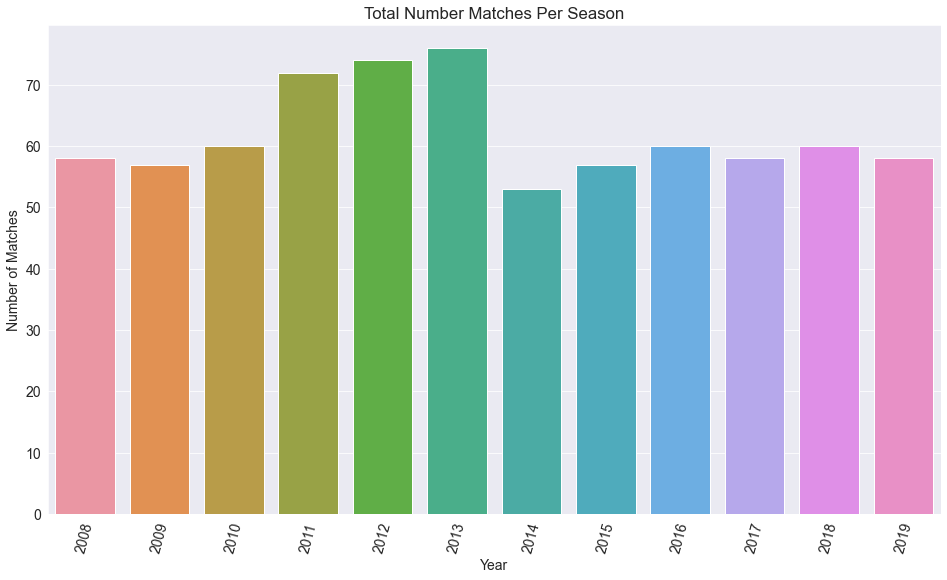

In [12]:
matplotlib.rcParams.update({'font.size': 14})

plt.figure(figsize = (16,9))
sns.barplot(x = season_list, y = total_matches_per_season_list)
plt.xticks(rotation=75)
plt.title("Total Number Matches Per Season")
plt.xlabel("Year")
plt.ylabel("Number of Matches")
plt.show()

In [13]:
## How many matches end up in tie ?

matches_df["result"].value_counts()

normal    734
tie         9
Name: result, dtype: int64

In [14]:
## maximum win by runs?

matches_df[matches_df['win_by_runs'] == matches_df['win_by_runs'].max()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
43,44,2017,Delhi,2017-05-06,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan


In [15]:
## maximum win by wicket?

matches_df[matches_df['win_by_wickets'] == matches_df['win_by_wickets'].max()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
34,35,2017,Chandigarh,2017-04-30,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,10,Sandeep Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",YC Barde,CK Nandan
71,72,2008,Mumbai,2008-04-27,Mumbai Indians,Deccan Chargers,Deccan Chargers,field,normal,0,Deccan Chargers,0,10,AC Gilchrist,Dr DY Patil Sports Academy,Asad Rauf,SL Shastri
119,120,2009,Cape Town,2009-04-19,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,field,normal,1,Delhi Daredevils,0,10,DL Vettori,Newlands,MR Benson,SD Ranade
183,184,2010,Bangalore,2010-03-18,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,JH Kallis,M Chinnaswamy Stadium,K Hariharan,DJ Harper
298,299,2011,Mumbai,2011-05-20,Mumbai Indians,Rajasthan Royals,Mumbai Indians,bat,normal,0,Rajasthan Royals,0,10,SR Watson,Wankhede Stadium,RE Koertzen,PR Reiffel
376,377,2012,Jaipur,2012-05-20,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Mumbai Indians,0,10,DR Smith,Sawai Mansingh Stadium,HDPK Dharmasena,C Shamshuddin
390,391,2013,Chandigarh,2013-04-10,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,10,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,C Shamshuddin
542,543,2015,Delhi,2015-04-26,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,VR Aaron,Feroz Shah Kotla,M Erasmus,S Ravi
590,591,2016,Rajkot,2016-04-21,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,10,B Kumar,Saurashtra Cricket Association Stadium,K Bharatan,HDPK Dharmasena


In [16]:
matches_df["city"].value_counts()

Mumbai            101
Kolkata            77
Delhi              73
Hyderabad          64
Bangalore          63
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          13
Ahmedabad          12
Visakhapatnam      12
Centurion          12
Mohali             10
Rajkot             10
Indore              9
Dharamsala          9
Johannesburg        8
Cuttack             7
Port Elizabeth      7
Abu Dhabi           7
Cape Town           7
Ranchi              7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
East London         3
Nagpur              3
Kimberley           3
Bloemfontein        2
Name: city, dtype: int64

### Location of Most Played Matches

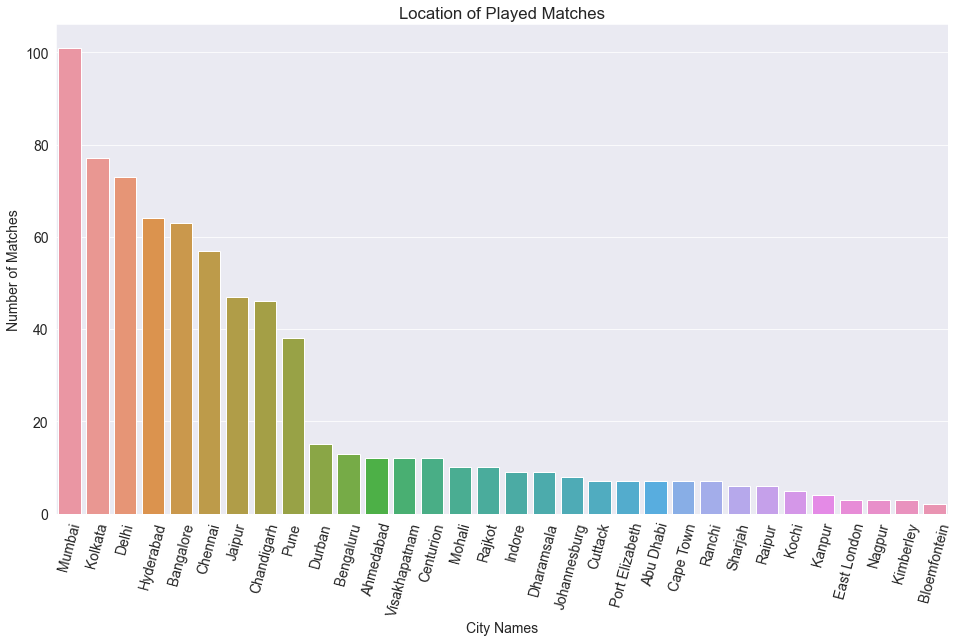

In [17]:
## Where are most of the matches played ?

matplotlib.rcParams.update({'font.size': 14})

plt.figure(figsize = (16,9))
sns.barplot(x = matches_df["city"].value_counts().index, y = matches_df["city"].value_counts())
plt.xticks(rotation=75)
plt.title("Location of Played Matches")
plt.xlabel("City Names")
plt.ylabel("Number of Matches")
plt.show()

In [18]:
matches_df["winner"].value_counts()

Mumbai Indians                 109
Chennai Super Kings             98
Kolkata Knight Riders           92
Royal Challengers Bangalore     82
Kings XI Punjab                 81
Rajasthan Royals                75
Delhi Daredevils                66
Sunrisers Hyderabad             56
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                   9
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

### Most Wining Teams

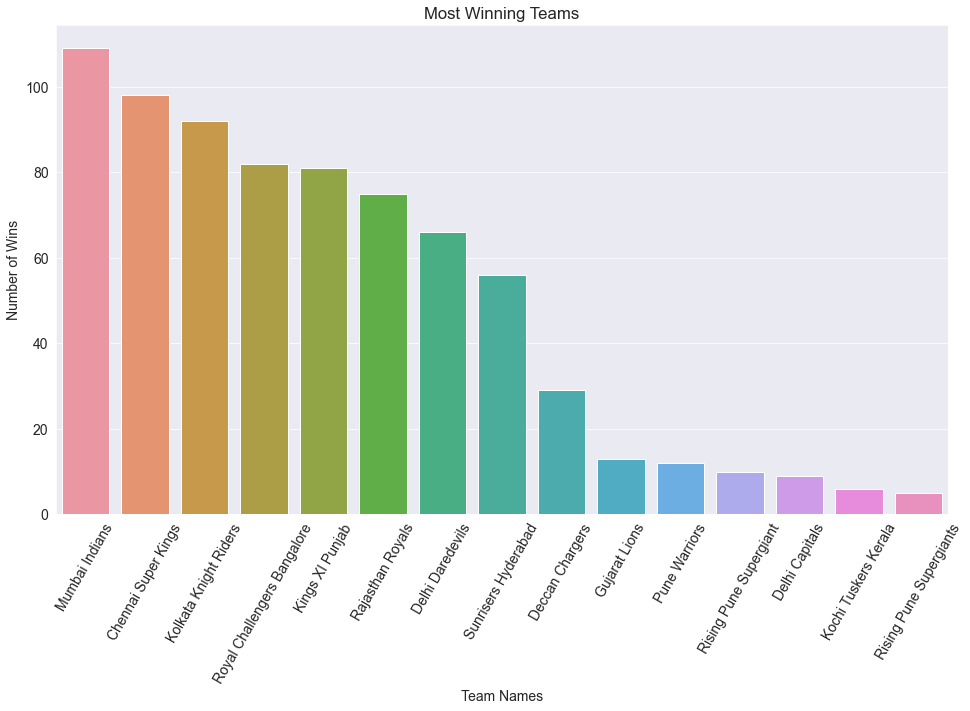

In [19]:
## Most Wining team?

matplotlib.rcParams.update({'font.size': 14})
plt.figure(figsize = (16,9))
sns.barplot(x = matches_df["winner"].value_counts().index, y = matches_df["winner"].value_counts())
plt.xticks(rotation=60)
plt.title("Most Winning Teams")
plt.xlabel("Team Names")
plt.ylabel("Number of Wins")
plt.show()

In [20]:
 matches_df["toss_winner"].value_counts()

Mumbai Indians                 96
Kolkata Knight Riders          91
Chennai Super Kings            89
Kings XI Punjab                80
Delhi Daredevils               79
Royal Challengers Bangalore    78
Rajasthan Royals               77
Sunrisers Hyderabad            45
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                  9
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

### Most Toss Wining Teams

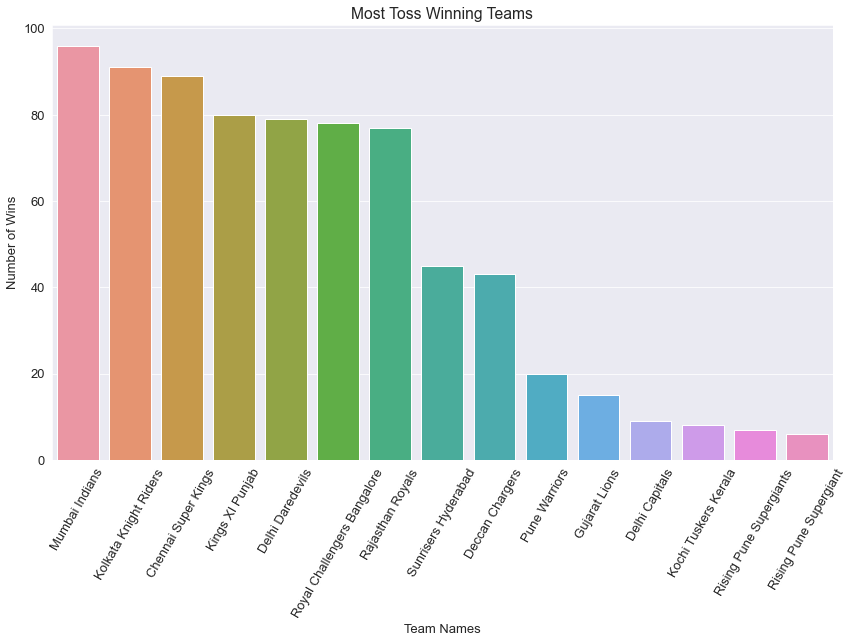

In [21]:
## Most Toss Wining team?

matplotlib.rcParams.update({'font.size': 13})
plt.figure(figsize = (14,8))
sns.barplot(x = matches_df["toss_winner"].value_counts().index, y = matches_df["toss_winner"].value_counts())
plt.xticks(rotation=60)
plt.title("Most Toss Winning Teams")
plt.xlabel("Team Names")
plt.ylabel("Number of Wins")
plt.show()

### Most Picked Toss Decision 

Out of 743 matches teams pick 455 times fielding and 455 times batting


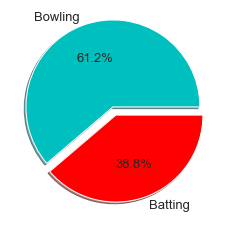

In [22]:
## What are the most toss decisions ?

toss_decision = matches_df["toss_decision"].value_counts().values

print("Out of {} matches teams pick {} times fielding and {} times batting".format(matches_df.shape[0],toss_decision[0],toss_decision[0]))

plt.pie(toss_decision, labels=["Bowling","Batting"], colors = ["c","r"],
        explode = [0.1,0], autopct="%0.1f%%", shadow = True)
plt.show()

In [23]:
best_player_df = matches_df["player_of_match"].value_counts().head(20)
best_player_df.index

Index(['CH Gayle', 'AB de Villiers', 'DA Warner', 'MS Dhoni', 'RG Sharma',
       'YK Pathan', 'SR Watson', 'SK Raina', 'G Gambhir', 'V Kohli',
       'MEK Hussey', 'AM Rahane', 'V Sehwag', 'A Mishra', 'DR Smith',
       'AD Russell', 'KA Pollard', 'JH Kallis', 'AT Rayudu', 'SP Narine'],
      dtype='object')

### Best Player in 12 Season

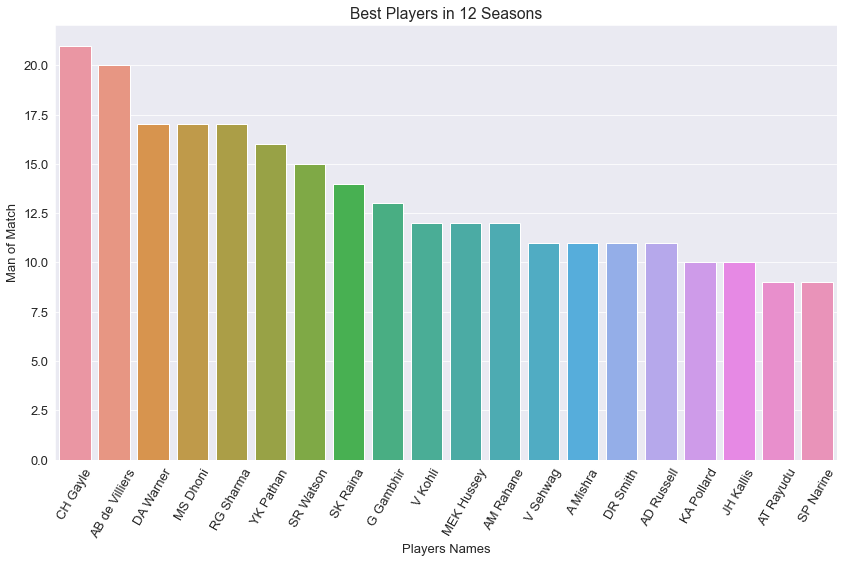

In [24]:
## Who was the best player in 12 season?

matplotlib.rcParams.update({'font.size': 13})
plt.figure(figsize = (14,8))
sns.barplot(x = best_player_df.index, y = best_player_df)
plt.xticks(rotation=60)
plt.title("Best Players in 12 Seasons")
plt.xlabel("Players Names")
plt.ylabel("Man of Match")
plt.show()

### Season Winner

In [35]:
## Season Winner

final_matches = matches_df.drop_duplicates(subset = ['season'], keep='last')
final_matches[['season','winner']].reset_index(drop = True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Sunrisers Hyderabad      1
Deccan Chargers          1
Rajasthan Royals         1
Name: winner, dtype: int64


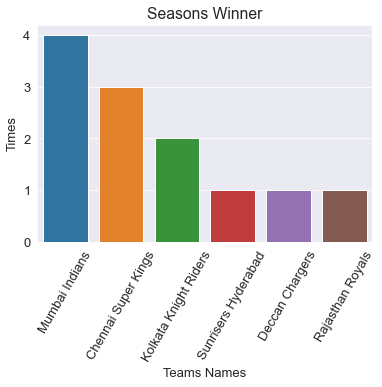

In [39]:
print(final_matches["winner"].value_counts())

matplotlib.rcParams.update({'font.size': 13})
# plt.figure(figsize = (14,8))
sns.barplot(x = final_matches["winner"].value_counts().index, y = final_matches["winner"].value_counts())
plt.xticks(rotation=60)
plt.title("Seasons Winner")
plt.xlabel("Teams Names")
plt.ylabel("Times")
plt.show()

## Exploring Cricket Deliveries Dataset

In [43]:
deliveries_df.sample(10)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
138350,585,2,Gujarat Lions,Mumbai Indians,6,2,AJ Finch,SK Raina,KH Pandya,0,0,0,0,0,0,1,0,1
110373,466,1,Kings XI Punjab,Sunrisers Hyderabad,10,5,GJ Maxwell,CA Pujara,KV Sharma,0,0,0,0,0,0,1,0,1
135301,572,2,Mumbai Indians,Sunrisers Hyderabad,2,3,LMP Simmons,PA Patel,B Kumar,0,1,0,0,0,0,0,1,1
73262,311,2,Kings XI Punjab,Rajasthan Royals,8,5,AM Nayar,DJ Hussey,KK Cooper,0,0,0,0,0,0,0,0,0
89293,378,1,Kolkata Knight Riders,Delhi Daredevils,5,6,G Gambhir,BB McCullum,M Morkel,0,0,0,0,0,0,0,0,0
10056,43,1,Rising Pune Supergiant,Sunrisers Hyderabad,18,2,MK Tiwary,MS Dhoni,Rashid Khan,0,0,0,0,0,0,2,0,2
145420,615,1,Royal Challengers Bangalore,Kings XI Punjab,8,5,V Kohli,AB de Villiers,KC Cariappa,0,0,0,0,0,0,0,0,0
74049,314,2,Kolkata Knight Riders,Rajasthan Royals,19,1,MK Tiwary,B Lee,KK Cooper,0,0,0,0,0,0,1,0,1
141542,599,1,Gujarat Lions,Delhi Daredevils,5,5,BB McCullum,DR Smith,CH Morris,0,0,0,0,0,0,0,0,0
134448,568,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,S Dhawan,DA Warner,MA Starc,0,0,0,1,0,0,0,1,1


### Four and Sixes Runs in Each Team

In [58]:
# fours and sixes runs in each team ?

fours_df = deliveries_df[deliveries_df["batsman_runs"] == 4]
fours_df = fours_df.groupby("batting_team")["batsman_runs"].count().reset_index()
fours_df.columns = ["batting_team","fours"]

sixs_df = deliveries_df[deliveries_df["batsman_runs"] == 6]
sixs_df = sixs_df.groupby("batting_team")["batsman_runs"].count().reset_index()
sixs_df.columns = ["batting_team","six"]

teams_runs_df = fours_df.merge(sixs_df, on="batting_team")
teams_runs_df["total_runs"] = teams_runs_df["fours"] + teams_runs_df["six"]

sorted_teams_runs_df = teams_runs_df.sort_values("total_runs", ascending=False).reset_index().drop("index", axis=1)
sorted_teams_runs_df

,batting_team,fours,six,total_runs
0,Mumbai Indians,2588,1096,3684
1,Royal Challengers Bangalore,2360,1132,3492
2,Kings XI Punjab,2458,976,3434
3,Kolkata Knight Riders,2434,930,3364
4,Chennai Super Kings,2193,973,3166
5,Delhi Daredevils,2158,801,2959
6,Rajasthan Royals,2035,681,2716
7,Sunrisers Hyderabad,1444,533,1977
8,Deccan Chargers,957,400,1357
9,Pune Warriors,525,196,721


### Top 15 player for 4 run

In [70]:
## Top 15 player for 4 run ?

fours_player_df = deliveries_df[deliveries_df["batsman_runs"] == 4]
fours_player_df = fours_player_df.groupby("batsman")["batsman_runs"].count().reset_index()
fours_player_df.sort_values("batsman_runs", ascending=False).head(15).reset_index().drop("index", axis=1)

,batsman,batsman_runs
0,S Dhawan,526
1,SK Raina,495
2,G Gambhir,492
3,V Kohli,482
4,DA Warner,459
5,RV Uthappa,436
6,RG Sharma,431
7,AM Rahane,405
8,CH Gayle,376
9,PA Patel,366


### Top 15 player for 6 run

In [71]:
## Top 15 player for 6 run ?

sixs_player_df = deliveries_df[deliveries_df["batsman_runs"] == 6]
sixs_player_df = sixs_player_df.groupby("batsman")["batsman_runs"].count().reset_index()
sixs_player_df.sort_values("batsman_runs", ascending=False).head(15).reset_index().drop("index", axis=1)

,batsman,batsman_runs
0,CH Gayle,327
1,AB de Villiers,214
2,MS Dhoni,207
3,SK Raina,195
4,RG Sharma,194
5,V Kohli,191
6,DA Warner,181
7,SR Watson,177
8,KA Pollard,175
9,YK Pathan,161


### Best Batsman

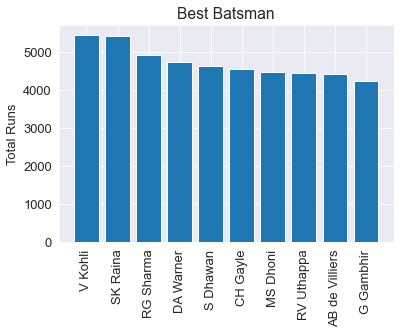

In [79]:
## Best Batsman

batsman_score = deliveries_df.groupby("batsman")["batsman_runs"].agg(['sum']).reset_index().sort_values('sum',
                                                                                        ascending=False).reset_index(drop=True)
batsman_score=batsman_score.rename(columns={'sum':'runs'}).iloc[:10,:]
plt.bar(x = batsman_score['batsman'], height = batsman_score['runs'])
plt.xticks(rotation=90)
plt.ylabel("Total Runs")
plt.title("Best Batsman")
plt.show()

## Detail Analysis

### Teams who won both matches and toss

In [30]:
## Teams who won both matches and toss?

overall_winner_team_df = matches_df[np.where(matches_df["toss_winner"] == matches_df["winner"], True, False)].reset_index()
overall_winner_team_df[["toss_winner","toss_decision","winner"]]

## Half of teams who won toss, also wins the game

,toss_winner,toss_decision,winner
0,Rising Pune Supergiant,field,Rising Pune Supergiant
1,Kolkata Knight Riders,field,Kolkata Knight Riders
2,Kings XI Punjab,field,Kings XI Punjab
3,Sunrisers Hyderabad,field,Sunrisers Hyderabad
4,Mumbai Indians,field,Mumbai Indians
...,...,...,...
383,Royal Challengers Bangalore,field,Royal Challengers Bangalore
384,Kings XI Punjab,field,Kings XI Punjab
385,Mumbai Indians,field,Mumbai Indians
386,Chennai Super Kings,field,Chennai Super Kings


### Winning Team Toss Decision

Winning Team Toss Decision Decision


field    256
bat      132
Name: toss_decision, dtype: int64


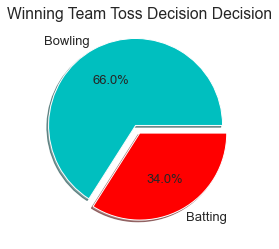

In [26]:
## Winning Team Pick?

print("Winning Team Toss Decision Decision\n\n")
print(overall_winner_team_df["toss_decision"].value_counts())

plt.pie(overall_winner_team_df["toss_decision"].value_counts().values, labels=["Bowling","Batting"], colors = ["c","r"],
        explode = [0.1,0], autopct="%0.1f%%", shadow = True)
plt.title("Winning Team Toss Decision Decision")
plt.show()

### Total Matches vs Wins for Teams

In [80]:
matches_df.sample(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
65,66,2008,Hyderabad,2008-04-22,Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,normal,0,Delhi Daredevils,0,9,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",IL Howell,AM Saheba
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford
270,271,2011,Jaipur,2011-05-01,Pune Warriors,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,6,LRPL Taylor,Sawai Mansingh Stadium,SK Tarapore,SJA Taufel
10,11,2017,Kolkata,2017-04-13,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,8,SP Narine,Eden Gardens,A Deshmukh,NJ Llong
589,590,2016,Mumbai,2016-04-20,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,6,RG Sharma,Wankhede Stadium,AK Chaudhary,CK Nandan


In [85]:
matches_played_by_teams=pd.concat([matches_df['team1'],matches_df['team2']],axis=1)

teams = (matches_played_by_teams['team1'].value_counts() + matches_played_by_teams['team2'].value_counts()).reset_index()
teams.columns=['team_name','matches_played']
teams

,team_name,matches_played
0,Chennai Super Kings,162
1,Deccan Chargers,75
2,Delhi Capitals,15
3,Delhi Daredevils,156
4,Gujarat Lions,30
5,Kings XI Punjab,175
6,Kochi Tuskers Kerala,14
7,Kolkata Knight Riders,177
8,Mumbai Indians,184
9,Pune Warriors,45


In [86]:
wins = pd.DataFrame(matches_df['winner'].value_counts()).reset_index()
wins.columns=['team_name','wins']
wins

,team_name,wins
0,Mumbai Indians,109
1,Chennai Super Kings,98
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,82
4,Kings XI Punjab,81
5,Rajasthan Royals,75
6,Delhi Daredevils,66
7,Sunrisers Hyderabad,56
8,Deccan Chargers,29
9,Gujarat Lions,13


In [94]:
win_teams = teams.merge(wins,on='team_name')
win_teams.columns = ['team','matches_played','won']
win_teams["won_percentage"] = win_teams["won"]*100 / win_teams["matches_played"] 
sorted_win_teams = win_teams.sort_values("won_percentage", ascending=False).reset_index(drop = True)
sorted_win_teams

,team,matches_played,won,won_percentage
0,Rising Pune Supergiant,16,10,62.500000
1,Chennai Super Kings,162,98,60.493827
2,Delhi Capitals,15,9,60.000000
3,Mumbai Indians,184,109,59.239130
4,Sunrisers Hyderabad,105,56,53.333333
5,Rajasthan Royals,144,75,52.083333
6,Kolkata Knight Riders,177,92,51.977401
7,Royal Challengers Bangalore,174,82,47.126437
8,Kings XI Punjab,175,81,46.285714
9,Gujarat Lions,30,13,43.333333


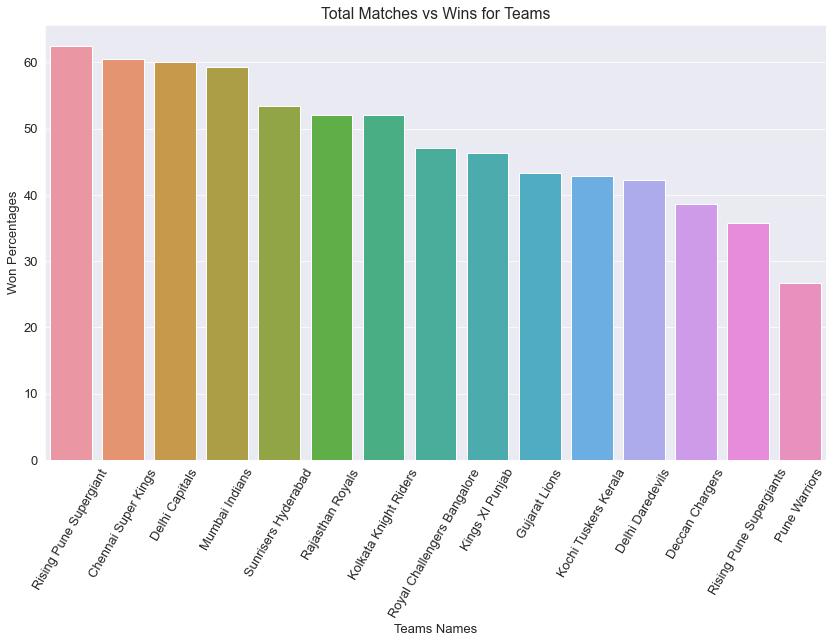

In [96]:
matplotlib.rcParams.update({'font.size': 13})
plt.figure(figsize = (14,8))
sns.barplot(x = sorted_win_teams.team, y = sorted_win_teams["won_percentage"])
plt.xticks(rotation=60)
plt.title("Total Matches vs Wins for Teams")
plt.xlabel("Teams Names")
plt.ylabel("Won Percentages")
plt.show()

# Inferences